# 4. AutoGrad & Optimizer

## Reference

- [Pytorch로 Linear Regression하기](https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817)
- [Pytorch로 Logistic Regression하기](https://medium.com/dair-ai/implementing-a-logistic-regression-model-from-scratch-with-pytorch-24ea062cd856)

<br>

## 4.1 `torch.nn.Module`

- 딥러닝을 구성하는 Layer의 base class
- Input, Output, Forward, Backward 정의
- 학습의 대상이 되는 parameter(tensor) 정의

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src='https://drive.google.com/uc?id=1VPHRUgwD9OO_nnEixNVept2TZiJys8mS' width=600/>

- 출처 : https://github.com/Vercaca/NN-Backpropagation

<br>

## 4.2 `nn.Parameter`

- Tensor 객체의 상속 객체
- `nn.Module` 내에 **attribute가 될 때**는 `required_grad=True` 로 지정되어 학습 대상이 되는 Tensor
  - AutoGrad 의 대상이 된다.
- 우리가 직접 지정할 일은 잘 없음
  - 대부분의 layer에는 weights 값들이 지정되어 있음

In [1]:
import torch
from torch import nn
from torch import Tensor

<br>

### 4.2.1 `nn.Parameter` 를 사용한 경우

In [13]:
# y = xw + b
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [14]:
x = torch.randn(5, 7)
x

tensor([[ 0.8719, -0.3145,  0.0670, -0.9979, -0.7501,  0.1836,  1.7317],
        [ 0.2546, -0.1744, -1.9533, -0.0467, -0.2540,  2.1732, -0.8496],
        [ 1.3753,  0.4517, -0.5626, -0.0966,  0.0560, -2.1966, -0.0613],
        [-0.8804,  0.3257,  1.0954, -0.9099,  0.1985, -0.5355, -2.2967],
        [-0.2407,  1.3238, -1.3670, -0.2902,  0.2766, -0.2352,  0.1143]])

In [15]:
layer = MyLiner(7, 12)
layer(x)

tensor([[ 3.1261, -0.7022,  1.0684, -4.9805,  3.4877,  3.8493,  1.8065,  2.0428,
         -1.7455, -0.8299, -2.8497,  1.4975],
        [ 2.7489,  0.1474, -1.5262,  1.7535, -1.9248,  1.7899, -4.6983, -0.7501,
         -1.9811,  5.1455,  1.9853, -2.0064],
        [ 2.8116,  3.7142, -0.3872, -2.4886,  2.8937, -0.1567,  3.5762, -1.8911,
         -7.4538, -3.6051, -3.4147,  3.9506],
        [ 1.6337, -1.6162, -0.7873,  0.6692, -3.5458, -0.5461, -0.5013,  1.0196,
         -1.9502, -1.5044, -2.6127,  4.9294],
        [ 1.8448,  2.8386,  0.0828,  1.8856, -3.6416,  1.5531,  2.0533, -0.8106,
         -3.1253,  1.4881, -3.3507,  1.7912]], grad_fn=<AddBackward0>)

In [16]:

layer(x).shape

torch.Size([5, 12])

In [17]:
for value in layer.parameters(): # 위에서 nn.Parameter 로 생성한 변수들을 확인할 수 있다.
    print(value)
    print()

Parameter containing:
tensor([[ 0.3598,  0.3617, -0.1174, -2.5588,  2.7432, -0.2767,  0.4811, -0.4362,
         -1.7330, -0.7120,  0.2476, -0.6357],
        [-0.2345,  1.1124,  0.8359, -0.4212, -1.2769, -0.1958,  1.8664,  0.4398,
         -0.1525, -0.3415, -1.3822, -0.2436],
        [-0.2979, -1.1038,  0.8330, -1.8960,  0.8268, -0.3427,  0.8805,  0.5878,
          0.6406, -1.2778, -0.0398,  0.2676],
        [-0.2775,  0.9769,  0.6901,  0.3678,  0.1060, -1.2242,  0.0652, -1.3215,
         -0.2698, -0.2453,  1.8295, -1.1495],
        [-0.9159, -0.4644, -0.5350,  0.5072,  0.0137, -0.2029,  0.3809, -1.8804,
         -0.4511,  1.1853,  0.3756,  0.0987],
        [-0.1299, -0.9511,  0.1772, -0.4321, -0.2103,  0.4076, -0.9883,  0.3059,
          1.0765,  1.4707,  1.0133, -1.5061],
        [-0.0979,  0.0463,  0.7147, -0.6357,  0.6039,  0.9456,  1.1525,  0.1374,
          0.6397,  0.1079, -0.4488, -0.2788]], requires_grad=True)

Parameter containing:
tensor([ 1.9881,  0.1272,  0.3950, -0.8270, -

<br>

### 4.2.2 `nn.Parameter` 를 사용하지 않은 경우

In [18]:
# y = xw + b
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weights = Tensor(torch.randn(in_features, out_features)) # nn.Parameter 대신 Tensor 사용
        self.bias = Tensor(torch.randn(out_features)) # nn.Parameter 대신 Tensor 사용

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [19]:
layer = MyLiner(7, 12)
layer(x)

tensor([[ 3.1410e+00,  1.1234e+00,  2.0270e+00,  3.6447e+00, -6.5910e-01,
          3.5443e+00,  9.5506e-02, -3.9354e+00, -1.7176e+00, -3.6524e+00,
          3.6014e+00,  7.8526e-01],
        [-3.3249e+00, -9.1701e-01, -7.9064e-01,  1.1312e+00,  6.7259e-02,
          6.0655e-01, -1.6668e+00,  3.2624e+00, -1.6060e-03,  2.8467e+00,
          3.2179e+00, -3.6363e+00],
        [-1.2161e-01,  3.0494e+00, -2.6437e+00,  1.8977e-01, -7.2891e-01,
          2.8160e+00, -3.6308e+00, -2.4766e+00, -9.0391e-01,  1.9096e-01,
          1.0093e+00,  1.8728e+00],
        [-1.5768e+00,  1.5508e+00,  4.0975e+00, -2.0138e+00,  2.7368e+00,
          1.5701e+00, -4.4339e+00, -3.3736e+00, -2.8892e+00,  9.4999e-01,
          2.9210e+00, -3.1779e-01],
        [-1.8481e+00,  5.8329e-01,  7.9688e-02,  2.4296e+00, -9.6476e-01,
          2.8529e+00,  2.1246e+00, -2.0029e+00, -1.2336e+00,  9.2301e-01,
         -1.4363e+00,  1.2250e+00]])

In [20]:
layer(x).shape

torch.Size([5, 12])

In [21]:
for value in layer.parameters(): # nn.Parameter 를 사용하지 않고 Tensor 를 사용했기 때문에 파라미터를 확인할 수 없다. (미분의 대상에서 제외됨)
    print(value)

<br>

## 4.3 Backward

- Layer에 있는 Parameter들의 미분을 수행
- Forward의 결과값 (model의 output=예측치)과 실제값간의 차이(loss) 에 대해 미분을 수행
- 해당 값으로 Parameter 업데이트

```python
for epoch in range(epochs):
    ……
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)

    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
………
```

<br>

### 4.3.1 실습: AutoGrad for Linear Regression

- https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$
y = 2x+1
$$

In [23]:
import numpy as np

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i+1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [24]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [25]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [26]:
import torch
from torch.autograd import Variable

class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [27]:
inputDim = 1 # takes variable 'x'
outputDim = 1 # takes variable 'y'
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [28]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [30]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradient
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update paramters
    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 0.19255782663822174
epoch 1, loss 0.1904074251651764
epoch 2, loss 0.18828140199184418
epoch 3, loss 0.18617898225784302
epoch 4, loss 0.18409989774227142
epoch 5, loss 0.18204401433467865
epoch 6, loss 0.18001113831996918
epoch 7, loss 0.17800109088420868
epoch 8, loss 0.17601333558559418
epoch 9, loss 0.1740477979183197
epoch 10, loss 0.17210417985916138
epoch 11, loss 0.17018233239650726
epoch 12, loss 0.16828183829784393
epoch 13, loss 0.16640280187129974
epoch 14, loss 0.16454459726810455
epoch 15, loss 0.16270712018013
epoch 16, loss 0.16089022159576416
epoch 17, loss 0.1590937376022339
epoch 18, loss 0.15731702744960785
epoch 19, loss 0.15556029975414276
epoch 20, loss 0.15382322669029236
epoch 21, loss 0.15210552513599396
epoch 22, loss 0.15040674805641174
epoch 23, loss 0.14872731268405914
epoch 24, loss 0.14706653356552124
epoch 25, loss 0.1454242616891861
epoch 26, loss 0.14380039274692535
epoch 27, loss 0.14219456911087036
epoch 28, loss 0.14060662686824799
ep

In [31]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.53180075]
 [ 2.5992258 ]
 [ 4.666651  ]
 [ 6.734076  ]
 [ 8.8015    ]
 [10.868925  ]
 [12.936352  ]
 [15.003777  ]
 [17.071201  ]
 [19.138626  ]
 [21.20605   ]]


In [32]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [33]:
for p in model.parameters():
    if p.requires_grad:
        print(p.name, p.data)

None tensor([[2.0674]])
None tensor([0.5318])


<br>

## 4.4 Backward from the scratch

- 실제 backward는 Module 단계에서 직접 지정가능
  - 하지만 autograd 가 해주기 때문에 직접 지정해 줄 필요 없다.
- Module에서 backward 와 optimizer 오버라이딩
- 사용자가 직접 미분 수식을 써야하는 부담
  - 쓸일은 없으나 순서는 이해할 필요는 있음

```python
# logistic regression
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # initialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {
            'dw': torch.zeros(dim, 1, dtype=torch.float).to(device),
            'db': torch.scalar_tensor(0).to(device)
        }
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1+torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads['dw'] = (1/x.shape[1]) * torch.mm(x, (yhat-y).T)
        self.grads['db'] = (1/x.shape[1]) * torch.sum(yhat-y)

    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads['dw']
        self.b = self.b - self.lr * self.grads['db']
```

- sigmoid

$$
h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} \mathbf{x}}}
$$

- compute backward w.r.t w

$$
\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{i}\right)-y^{i}\right) x_{j}^{i}
$$

- compute backward w.r.t b

$$
\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{i}\right)-y^{i}\right)
$$

- optimization step

$$
\begin{aligned}
\theta_{j} &:=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta) \\
&:=\theta_{j}-\alpha \sum_{i=1}^{m}\left(h_{\theta}\left(x^{i}\right)-y^{i}\right) x_{j}^{i}
\end{aligned}
$$

<br>

### 4.4.1 실습: Logistic Regression

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (1.31 at the time of this tutorial)
print(torch.__version__)

1.9.0+cu102


In [2]:
## configuration to detect cuda or cpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [4]:
import urllib
import os
import shutil
from zipfile import ZipFile

urllib.request.urlretrieve(DATA_PATH, 'hymenoptera_data.zip')

with ZipFile('hymenoptera_data.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()

os.rename('hymenoptera_data', 'data')

In [6]:
## configure root folder on your gdrive
data_dir = './data'

# custom transformer to flatten the image tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size
    
    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

# transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ])
}

# load the corresponding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

# load the entire dataset; we are not using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


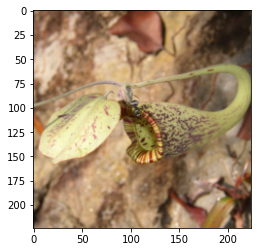

In [9]:
# load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print('Dimension of image:', x.shape, '\n',
      'Dimension of labels', y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())
plt.show()

In [14]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)
    
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m) * torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [15]:
## model pretesting
x, y = next(iter(train_dataset))

# flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

## num_px is the dimension of the images
dim = x_flatten.shape[0]

# model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print('Cost: ', cost)
print('Accuracy: ', prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [17]:
# hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0) 
    return x_flatten, y 

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)
        
    # backward
    lrmodel.backward(x.to(device), 
                    yhat.to(device), 
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, 
                                                                                    cost, 
                                                                                    train_pred,
                                                                                    test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691471338272095 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825269699097 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245336532592773 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225959777832 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045235395431519 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960511565208435 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883084535598755 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811557173728943 | Train Acc: 

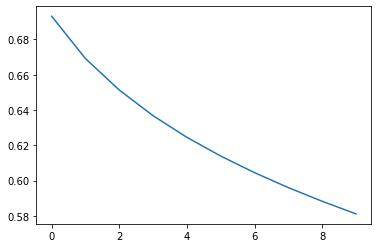

In [19]:
# the trend in the context of loss
plt.plot(costs)
plt.show()